{'B': {'B': 291, 'C': 524, 'A': 660}, 'A': {'B': 1132, 'C': 759, 'A': 593}, 'C': {'B': 337, 'C': 123, 'A': 345}}
1475
['B', 'A', 'C']


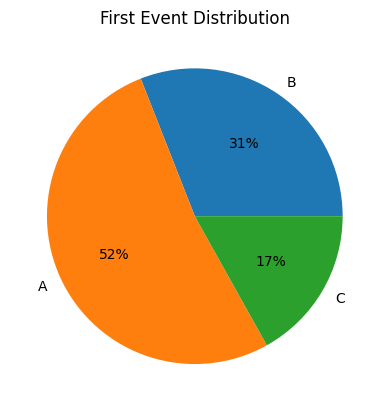

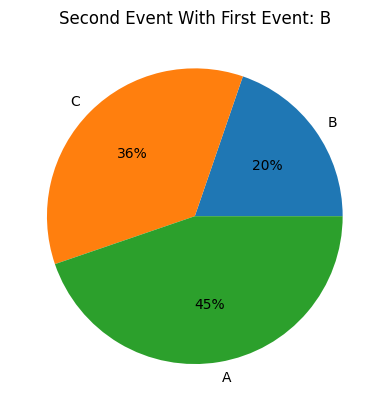

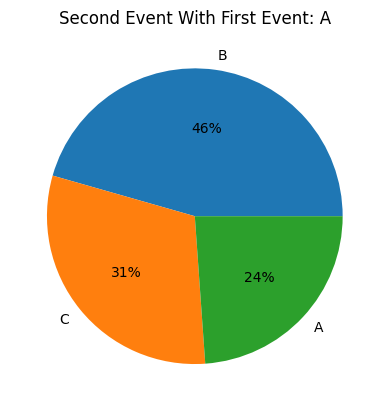

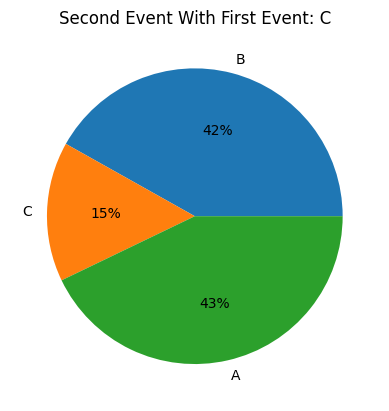

In [30]:
import glob
import matplotlib.pyplot as plt
import seaborn as sns

def name_mapping(input):
    return input

data = {}
for log in glob.glob("logs/*.txt"):
    with open(log) as f:
        events = ""
        for line in f:
            if "eEventA processed" in line:
                events += "A"
            if "eEventB processed" in line:
                events += "B"
            if "eEventC processed" in line:
                events += "C"
        if len(events) > 2:
            if events[0] not in data:
                data[events[0]] = {}
            if events[1] not in data[events[0]]:
                data[events[0]][events[1]] = 0
            data[events[0]][events[1]] += 1
print(data)

print(sum(list(data.values())[0].values()))
values = list(map(lambda it: sum(it.values()), list(data.values())))
keys = [name_mapping(x) for x in data.keys()]
print(keys)
plt.pie(values, labels = keys, autopct='%.0f%%')
plt.title("First Event Distribution")
plt.show()

        
for key, value in data.items():
    plt.pie(value.values(), labels = [name_mapping(it) for it in value.keys()], autopct='%.0f%%')
    plt.title(f"Second Event With First Event: {name_mapping(key)}")
    plt.show()